# TASK 2- THE SPARKS FOUNDATION INTERNSHIP OCT'2020

PREDICTION USING UNSUPERVISED LEARNING

Iris Dataset-https://bit.ly/3kXTdox


In [3]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #for visualization
%matplotlib inline
from sklearn.preprocessing import StandardScaler #because below dataset needs standardization
from sklearn import datasets
#To load the iris dataset from the sklearn in the next step

# NOW LOADING THE DATASET AND STUDYING ITS FEATURES

In [5]:
#loading the iris dataset already present in sklearn library
iris= datasets.load_iris()
iris_df= pd.DataFrame(iris.data,columns= iris.feature_names)
iris_df.head() #To see the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
#To get the information of the dataset
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
iris_df.shape
#Outputs tells us that the iris_dataset has total 150 rows and 4 column 

(150, 4)

In [11]:
#To check the duplicate data and drop them and check if any value is null
iris_df-iris_df.drop_duplicates()
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [12]:
#DESCRIBING THE DATASET TO UNDERSTAND ITS RELATIONSHIP
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Here, we can conclude that standardization must be done before training the algorithm in order to obtain k-mean clustering.

In [13]:
#independent feature defining X
X=iris_df.iloc[:,:]

In [14]:
#Standardization of the dataset
sc= StandardScaler()
X_std=sc.fit_transform(X)
X_std=pd.DataFrame(X_std)
X_std.columns=X.columns


In [15]:
X_std

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


# NOW DERIVING THE K VALUE USING ELBOW METHOD

In [17]:
#importing K means from the library 
from sklearn.cluster import KMeans 
#training the model using K means clustering

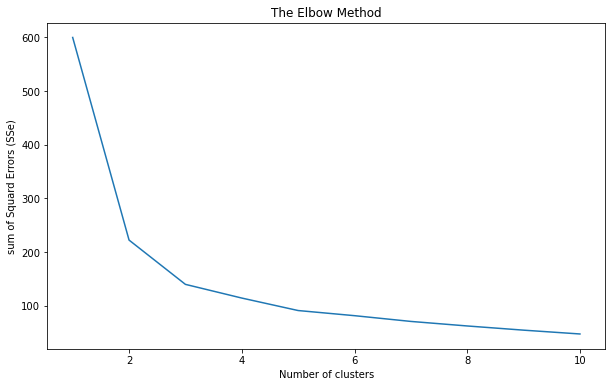

In [20]:
plt.figure(figsize=(10,6))
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X_std)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('sum of Squard Errors (SSe)')
plt.show()

AS SEEN FROM THE ABOVE GRAPH THE ELBOW CURVE WE CAN CONCLUDE THAT THE ELBOW POINT IS 3 


THEREFORE_NUMBER OF CLUSTERS(K) = 3

TRAINING THE ALGORITHM AND FITTING THE DATASET

In [25]:
#declaring that k=3 and maximum iteration to be done is 100 and k-means++ for faster convergence
km=KMeans(n_clusters=3,max_iter=100,init='k-means++')

In [32]:
#fitting model prediction_with standardization
y_kmeans=km.fit_predict(X_std)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [33]:
#without standardization
km1=KMeans(n_clusters=3,max_iter=100,init='k-means++')
y_kmeans1=km1.fit_predict(X)
y_kmeans1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

# VIRTUALIZATION OF THE DATASET PREDICTION 


(1) PLOTTING WITHOUT STANDARDIZATION 

<function matplotlib.pyplot.show(*args, **kw)>

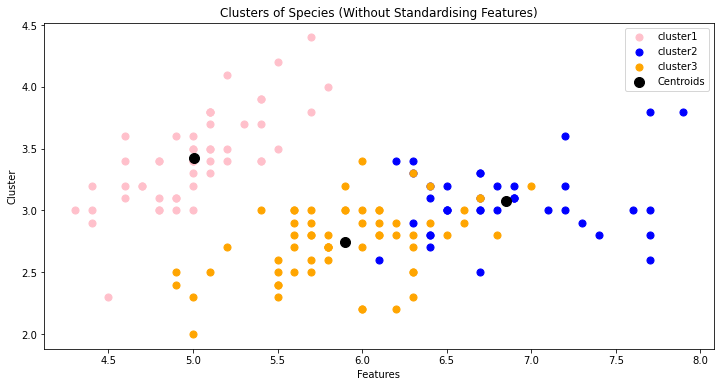

In [35]:
plt.figure(figsize=(12,6))

plt.scatter(X.iloc[y_kmeans1==1,0],X.iloc[y_kmeans1==1,1],s=50,c='pink',label='cluster1')
plt.scatter(X.iloc[y_kmeans1==2,0],X.iloc[y_kmeans1==2,1],s=50,c='blue',label='cluster2')
plt.scatter(X.iloc[y_kmeans1==0,0],X.iloc[y_kmeans1==0,1],s=50,c='orange',label='cluster3')
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],marker='.',s=400,c='black',label='Centroids')

plt.title('Clusters of Species (Without Standardising Features)')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.legend()
plt.show





(2) PLOTTING WITH STANDARDIZATION


<function matplotlib.pyplot.show(*args, **kw)>

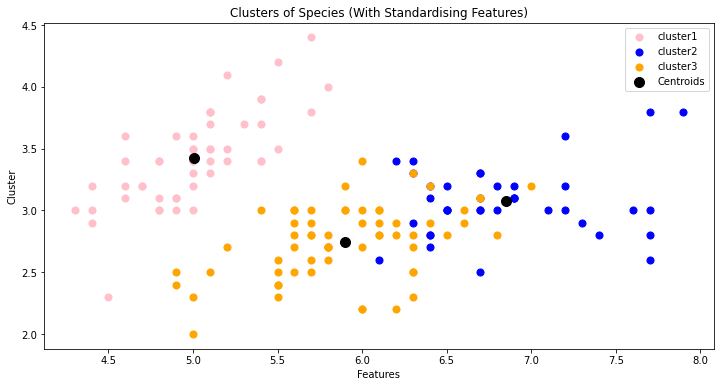

In [36]:
plt.figure(figsize=(12,6))

plt.scatter(X.iloc[y_kmeans1==1,0],X.iloc[y_kmeans1==1,1],s=50,c='pink',label='cluster1')
plt.scatter(X.iloc[y_kmeans1==2,0],X.iloc[y_kmeans1==2,1],s=50,c='blue',label='cluster2')
plt.scatter(X.iloc[y_kmeans1==0,0],X.iloc[y_kmeans1==0,1],s=50,c='orange',label='cluster3')
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],marker='.',s=400,c='black',label='Centroids')

plt.title('Clusters of Species (With Standardising Features)')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.legend()
plt.show

HENCE, we can derive that the cluster 2 and 3 are more accurate in the stadardized training modelby the virtualization of the clustering.
